In [ ]:
# INF2178 - Assignment1
# Student Name: Jingxian Chen
# Student Number: 1005354572
# Creation Date: Feb 3, 2024

In [1]:
import pandas as pd
import scipy as sp

shelter_data_df = pd.read_csv("INF2178_A1_data_1.csv")
shelter_data_df

,OCCUPANCY_DATE,ORGANIZATION_NAME,PROGRAM_ID,PROGRAM_NAME,SECTOR,PROGRAM_MODEL,OVERNIGHT_SERVICE_TYPE,PROGRAM_AREA,SERVICE_USER_COUNT,CAPACITY_TYPE,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS
0,2021/1/1,COSTI Immigrant Services,15371,COSTI North York West Hotel - Family Program,Families,Emergency,Motel/Hotel Shelter,COVID-19 Response,74,Room Based Capacity,NaN,NaN,29.0,26.0
1,2021/1/1,COSTI Immigrant Services,16211,COSTI North York West Hotel - Seniors Program,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,3,Room Based Capacity,NaN,NaN,3.0,3.0
2,2021/1/1,COSTI Immigrant Services,16192,COSTI North York West Hotel Program - Men,Men,Emergency,Motel/Hotel Shelter,COVID-19 Response,24,Room Based Capacity,NaN,NaN,28.0,23.0
3,2021/1/1,COSTI Immigrant Services,16191,COSTI North York West Hotel Program - Mixed Adult,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,25,Room Based Capacity,NaN,NaN,17.0,17.0
4,2021/1/1,COSTI Immigrant Services,16193,COSTI North York West Hotel Program - Women,Women,Emergency,Motel/Hotel Shelter,COVID-19 Response,13,Room Based Capacity,NaN,NaN,14.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50939,2021/12/31,YWCA Toronto,14671,YWCA Davenport - Youth,Youth,Emergency,Shelter,Base Shelter and Overnight Services System,6,Bed Based Capacity,20.0,6.0,NaN,NaN
50940,2021/12/31,Youth Without Shelter,12292,Youth without Shelter Emergency Shelter Program,Youth,Emergency,Shelter,Base Shelter and Overnight Services System,23,Bed Based Capacity,23.0,23.0,NaN,NaN
50941,2021/12/31,Youth Without Shelter,12291,Youth without Shelter Stay In School Program,Youth,Transitional,Shelter,Base Shelter and Overnight Services System,13,Bed Based Capacity,14.0,13.0,NaN,NaN
50942,2021/12/31,YouthLink,14891,YouthLink Emergency Program,Mixed Adult,Emergency,Shelter,Base Shelter and Overnight Services System,10,Bed Based Capacity,10.0,10.0,NaN,NaN


<ipython-input-4-f7dec7221e9d>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = shelter_data_df.corr()


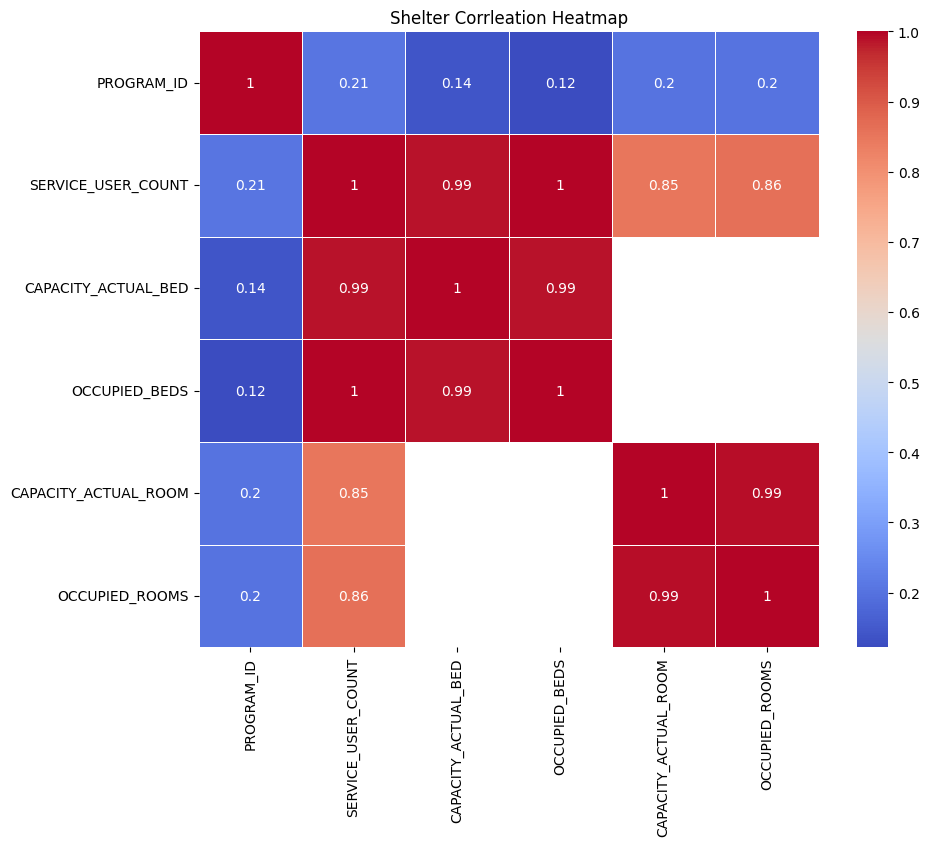

In [4]:
# Setting up the heatmap
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = shelter_data_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',linewidth=.5)
plt.title('Shelter Corrleation Heatmap')
plt.show()

Emergency
Min: 1
Max: 339
Median: 33.0
Mean: 49.06
Standard Deviation: 55.92


Transitional
Min: 1
Max: 221
Median: 23.0
Mean: 30.99
Standard Deviation: 36.43




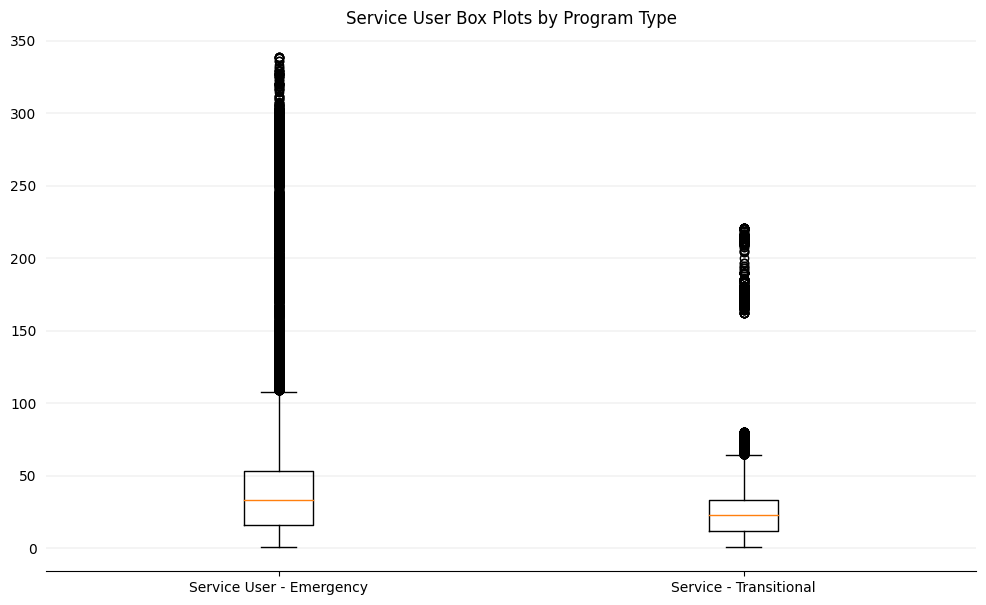

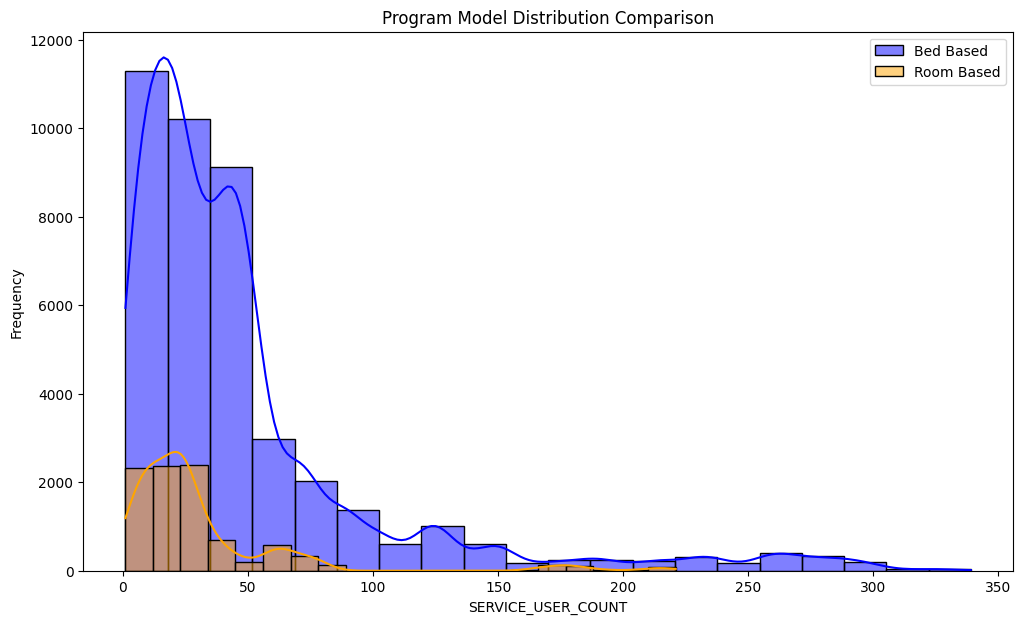

In [13]:
# EDA 1 (the services user NUMBER by PROGRAM_MODEL)

import numpy as np

valid_emergency_data = shelter_data_df[shelter_data_df['PROGRAM_MODEL'] == 'Emergency']['SERVICE_USER_COUNT'].dropna()
valid_transitional_data = shelter_data_df[shelter_data_df['PROGRAM_MODEL'] == 'Transitional']['SERVICE_USER_COUNT'].dropna()

# Define a function to describe statistics
def get_summary_statistics(dataset_name, dataset):
    mean = np.round(np.mean(dataset), 2)
    median = np.round(np.median(dataset), 2)
    min_value = np.round(np.min(dataset), 2)
    max_value = np.round(np.max(dataset), 2)
    std_dev = np.round(np.std(dataset), 2)

    print(f'{dataset_name}')
    print('Min: %s' % min_value)
    print('Max: %s' % max_value)
    print('Median: %s' % median)
    print('Mean: %s' % mean)
    print('Standard Deviation: %s' % std_dev)

    print('\n')

get_summary_statistics('Emergency', valid_emergency_data.dropna())
get_summary_statistics('Transitional', valid_transitional_data.dropna())

import matplotlib.pyplot as plt

# Set up boxplot
fig, ax = plt.subplots(figsize=(12, 7))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Set up y axis
ax.yaxis.set_ticks_position('none')

# Add the grid
ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)

# Set up the title
ax.set_title('Service User Box Plots by Program Type')

# Prepare the data and the label
dataset = [valid_emergency_data.dropna(), valid_transitional_data.dropna()]
labels = ['Service User - Emergency', 'Service - Transitional']

# Draw the box plot
ax.boxplot(dataset, labels=labels)

plt.show()

import seaborn as sns

plt.figure(figsize=(12, 7))

# Histogram for 'Emergency' program model
sns.histplot(valid_emergency_data, bins=20, kde=True, color='blue', label='Bed Based')

# Histogram for 'Transitional' service user count
sns.histplot(valid_transitional_data, bins=20, kde=True, color='orange', label='Room Based')

plt.title('Program Model Distribution Comparison')
plt.xlabel('SERVICE_USER_COUNT')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [5]:
# T-test 1 (the services user NUMBER by PROGRAM_MODEL)

# T-test

# 1) Performing Welch's t-tests
t_stat, p_val = sp.stats.ttest_ind(valid_emergency_data, valid_transitional_data, equal_var=False)

# Results
print("Welch's t-statistic:", str(t_stat))
print("Welch's p-value:", str(p_val))

# 2)Performing Tow-sample t-tests
t_stat_1, p_val_1 = sp.stats.ttest_ind(valid_emergency_data, valid_transitional_data, equal_var=True)

# Results
print("Two-sample t-statistic:", str(t_stat_1))
print("Two-sample p-value:", str(p_val_1))

Welch's t-statistic: 38.85174699254652
Welch's p-value: 0.0
Two-sample t-statistic: 29.937570467283667
Two-sample p-value: 3.1720139638162956e-195


OCCUPIED_BEDS
Min: 1.0
Max: 234.0
Median: 23.0
Mean: 29.78
Standard Deviation: 26.38


OCCUPIED_ROOMS
Min: 1.0
Max: 268.0
Median: 34.0
Mean: 52.8
Standard Deviation: 58.79




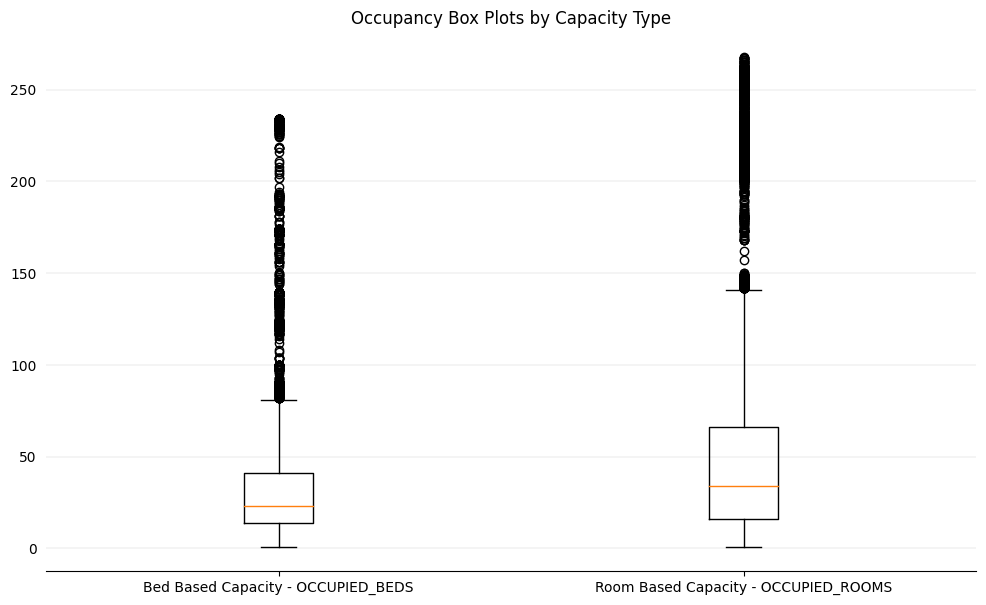

<Figure size 1200x700 with 0 Axes>

<Figure size 1200x700 with 0 Axes>

In [14]:
# EDA 2 (occupied beds/rooms NUMBER by occupancy TYPE)

get_summary_statistics('OCCUPIED_BEDS', shelter_data_df['OCCUPIED_BEDS'].dropna())
get_summary_statistics('OCCUPIED_ROOMS', shelter_data_df['OCCUPIED_ROOMS'].dropna())

import matplotlib.pyplot as plt

# Set up boxplot
fig, ax = plt.subplots(figsize=(12, 7))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Set up y axis
ax.yaxis.set_ticks_position('none')

# Add the grid
ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)

# Set up the title
ax.set_title('Occupancy Box Plots by Capacity Type')

# Prepare the data and the label
dataset = [shelter_data_df['OCCUPIED_BEDS'].dropna(), shelter_data_df['OCCUPIED_ROOMS'].dropna()]
labels = ['Bed Based Capacity - OCCUPIED_BEDS', 'Room Based Capacity - OCCUPIED_ROOMS']

# Draw the box plot
ax.boxplot(dataset, labels=labels)

plt.show()

import seaborn as sns

plt.figure(figsize=(12, 7))

OCCUPANCY_RATE_BED
Min: 0.02
Max: 1.0
Median: 1.0
Mean: 0.93
Standard Deviation: 0.12


OCCUPANCY_RATE_ROOM
Min: 0.01
Max: 1.01
Median: 1.0
Mean: 0.93
Standard Deviation: 0.16




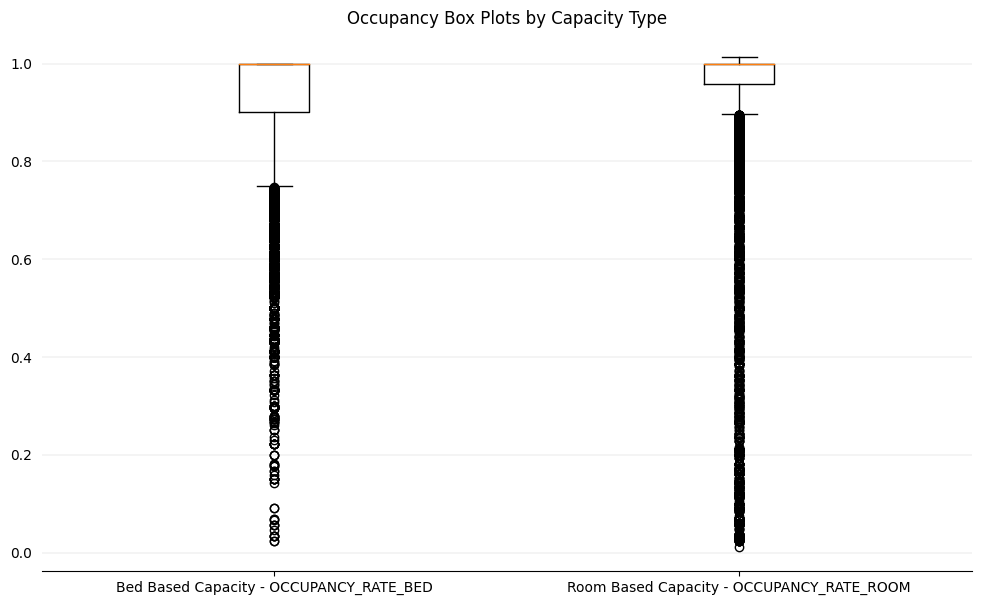

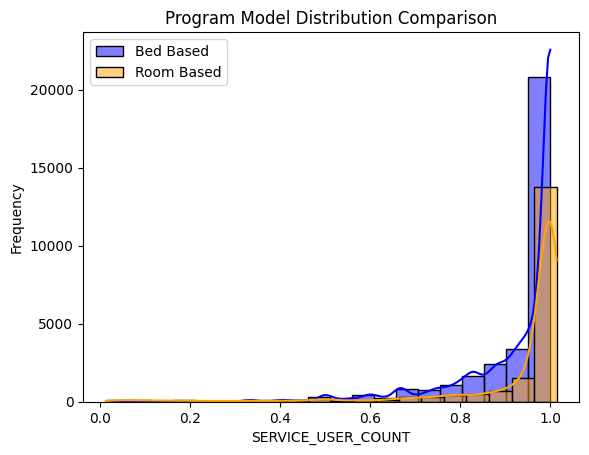

In [16]:
# EDA 3 (occupied beds/rooms RATE by occupancy TYPE)
# Filter data for valid occupancy rates
shelter_data_df['OCCUPANCY_RATE_BED'] = shelter_data_df['OCCUPIED_BEDS'] / shelter_data_df['CAPACITY_ACTUAL_BED']
shelter_data_df['OCCUPANCY_RATE_ROOM'] = shelter_data_df['OCCUPIED_ROOMS'] / shelter_data_df['CAPACITY_ACTUAL_ROOM']

valid_bed_rate_data = shelter_data_df[shelter_data_df['CAPACITY_TYPE'] == 'Bed Based Capacity']['OCCUPANCY_RATE_BED'].dropna()
valid_room_rate_data = shelter_data_df[shelter_data_df['CAPACITY_TYPE'] == 'Room Based Capacity']['OCCUPANCY_RATE_ROOM'].dropna()

get_summary_statistics('OCCUPANCY_RATE_BED', shelter_data_df['OCCUPANCY_RATE_BED'].dropna())
get_summary_statistics('OCCUPANCY_RATE_ROOM', shelter_data_df['OCCUPANCY_RATE_ROOM'].dropna())

import matplotlib.pyplot as plt

# Set up boxplot
fig, ax = plt.subplots(figsize=(12, 7))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Set up y axis
ax.yaxis.set_ticks_position('none')

# Add the grid
ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)

# Set up the title
ax.set_title('Occupancy Box Plots by Capacity Type')

# Prepare the data and the label
dataset = [shelter_data_df['OCCUPANCY_RATE_BED'].dropna(), shelter_data_df['OCCUPANCY_RATE_ROOM'].dropna()]
labels = ['Bed Based Capacity - OCCUPANCY_RATE_BED', 'Room Based Capacity - OCCUPANCY_RATE_ROOM']

# Draw the box plot
ax.boxplot(dataset, labels=labels)

plt.show()

# Histogram for 'bed occupied rate'
sns.histplot(valid_bed_rate_data, bins=20, kde=True, color='blue', label='Bed Based')

# Histogram for 'room occupied rate'
sns.histplot(valid_room_rate_data, bins=20, kde=True, color='orange', label='Room Based')

plt.title('Program Model Distribution Comparison')
plt.xlabel('SERVICE_USER_COUNT')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [10]:
# T-test 2 (the occupancy RATE by occupancy TYPE)

# 1) Performing Welch's t-tests
t_stat, p_val = sp.stats.ttest_ind(valid_bed_rate_data, valid_room_rate_data, equal_var=False)

# Results
print("Welch's t-statistic:", str(t_stat))
print("Welch's p-value:", str(p_val))

# 2)Performing Tow-sample t-tests
t_stat_1, p_val_1 = sp.stats.ttest_ind(valid_bed_rate_data, valid_room_rate_data, equal_var=True)

# Results
print("Two-sample t-statistic:", str(t_stat_1))
print("Two-sample p-value:", str(p_val_1))

Welch's t-statistic: -4.498751771925636
Welch's p-value: 6.860477551487939e-06
Two-sample t-statistic: -4.854104599422829
Two-sample p-value: 1.2128933183471424e-06
